In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# xlsx = pd.ExcelFile('./Data/book1cut.xlsx')

xlsx = pd.ExcelFile('./Data/Outlier_thresh1_50.xlsx')
df5 = pd.read_excel(xlsx, '1S 5X')
dataset5= df5.copy()
df4 = pd.read_excel(xlsx, '1S 4X')
dataset4= df4.copy()
df3 = pd.read_excel(xlsx, '1S 3X')
dataset3= df3.copy()
df2 = pd.read_excel(xlsx, '1S 2X')
dataset2= df2.copy()
df1 = pd.read_excel(xlsx, '1S 1X')
dataset1= df1.copy()



# STANDARDIZE

In [35]:
#     using mean of each feature
from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
Sd_scaler1=scaler1.fit(dataset4)
data1_Sd= Sd_scaler1.transform(dataset4)
# print(data1_Sd)

# convert standardized(numpy) datatype to pandas dataframe
pd_data1_Sd= pd.DataFrame(data1_Sd, columns=dataset4.keys())

pd_data1_Sd

,DEPTH,CALI,GR,ILD,ITT,LLD,LLS,MSFL,NPHI,RHOB,SFL,SP
0,-1.731639,2.516979,0.147815,0.637840,-0.317773,-0.311624,-0.309417,-0.685180,1.331626,-2.877258,-0.029983,-3.067635
1,-1.730816,2.529231,0.412963,-0.218280,-0.412743,-0.314144,-0.323037,-0.685559,1.492952,-2.939449,-0.314791,-3.747738
2,-1.729992,2.541482,0.803474,-0.114471,-0.507713,-0.313667,-0.336657,-0.685904,1.654278,-3.001640,-0.257373,-4.217849
3,-1.729169,2.553733,1.058458,0.136484,-0.602683,-0.307471,-0.350277,-0.685559,1.653294,-3.063831,-0.054320,-4.944131
4,-1.728345,2.565985,1.026933,0.278547,-0.593186,-0.306495,-0.363896,-0.685870,1.548039,-3.126022,0.148734,-5.242861
...,...,...,...,...,...,...,...,...,...,...,...,...
4202,1.728345,-0.575181,-0.686343,-0.077954,-1.386187,-0.057868,0.009181,-0.267572,-0.932841,-0.008639,-0.090701,1.709306
4203,1.729169,-0.575474,-0.659878,-0.065343,-1.362445,-0.125620,-0.082412,-0.270226,-0.970221,-0.029158,-0.109388,1.746619
4204,1.729992,-0.575767,-0.633413,-0.044466,-1.343451,-0.147659,-0.157118,-0.272881,-1.007602,0.060321,-0.123104,1.754365
4205,1.730816,-0.575968,-0.606948,-0.023588,-1.329205,-0.169698,-0.164358,-0.275536,-1.044982,0.145992,-0.132143,1.742303


# Filter features by correlation

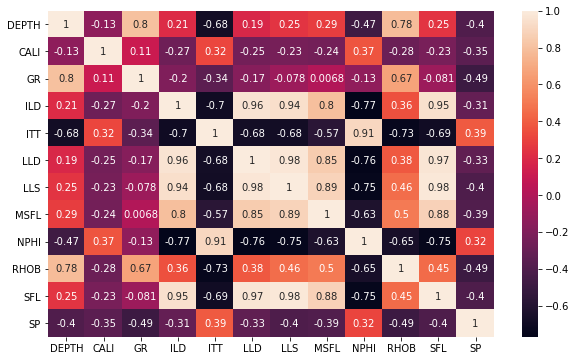

In [36]:
import seaborn as sn
import matplotlib.pyplot as plt

fig_dims = (10,6)
fig, ax = plt.subplots(figsize = fig_dims)
sn.heatmap(dataset2.corr(),ax=ax ,annot=True,
          )
plt.show()

In [37]:
abs(dataset2.corr()['RHOB'][abs(dataset2.corr()['RHOB'])>0.5])

DEPTH    0.783340
GR       0.672281
ITT      0.734752
MSFL     0.504259
NPHI     0.652063
RHOB     1.000000
Name: RHOB, dtype: float64

In [110]:
# so i want to drop every feature that has a correlation <0.5 against RHOB

# keep everything that has a correlation of alt least 0.5

drop_lowCor=abs(dataset2.corr()['RHOB'][abs(dataset2.corr()['RHOB'])>0.5].drop('RHOB')).index.tolist()
drop_lowCor


['DEPTH', 'GR', 'ITT', 'MSFL', 'NPHI']

In [38]:
abs(pd_data1_Sd.corr()['RHOB'][abs(pd_data1_Sd.corr()['RHOB'])>0.5])


DEPTH    0.688033
CALI     0.854475
ITT      0.854359
NPHI     0.725371
RHOB     1.000000
Name: RHOB, dtype: float64

In [62]:
# an iteration to determine which correlation rate provides best R2 squared value
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

# using linear regression
lr = LinearRegression()

vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for val in vals:
    features =abs(pd_data1_Sd.corr()['RHOB'][abs(pd_data1_Sd.corr()['RHOB'])>val].drop('RHOB')).index.tolist()
    
    X = pd_data1_Sd.drop(columns='RHOB')
    y=pd_data1_Sd['RHOB']
    X=X[features]
    print(features)


    y_pred = cross_val_predict(lr, X, y, cv=cv)
    print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
    print("R_squared: " + str(round(r2_score(y,y_pred),2)))


['DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI', 'SFL', 'SP']
RMSE: 0.39
R_squared: 0.85
['DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI', 'SFL']
RMSE: 0.41
R_squared: 0.83
['DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI', 'SFL']
RMSE: 0.41
R_squared: 0.83
['DEPTH', 'CALI', 'ITT', 'MSFL', 'NPHI']
RMSE: 0.43
R_squared: 0.82
['DEPTH', 'CALI', 'ITT', 'NPHI']
RMSE: 0.43
R_squared: 0.82
['DEPTH', 'CALI', 'ITT', 'NPHI']
RMSE: 0.43
R_squared: 0.82
['CALI', 'ITT', 'NPHI']
RMSE: 0.44
R_squared: 0.8


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from math import sqrt


vals = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for val in vals:
    features =abs(pd_data1_Sd.corr()['RHOB'][abs(pd_data1_Sd.corr()['RHOB'])>val].drop('RHOB')).index.tolist()
    
    X = pd_data1_Sd.drop(columns='RHOB')
    y=pd_data1_Sd['RHOB']
    X=X[features]
    
    print(features)
    
    
#     cv = KFold(n_splits=10, random_state=0, shuffle=False)
#     classifier_pipeline = make_pipeline(StandardScaler(), myANN1( X, y))
    
    myANN1( X, y)
#     print("r2 score: {}".format(metrics.r2_score(test_target,predicted)))
#     print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

    
    
#     y_pred = cross_val_predict(classifier_pipeline, Wrapper_X, Wrapper_y, cv=cv)
    
    
    

#     y_pred = cross_val_predict(classifier_pipeline, X, y, cv=cv)
#     print("RMSE: " + str(round(sqrt(mean_squared_error(y,y_pred)),2)))
#     print("R_squared: " + str(round(r2_score(y,y_pred),2)))


['DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI', 'SFL', 'SP']
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                768       
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________
r2 score: 0.8853429051534185
['DEPTH'

## Feature Selection Using a Wrapper

In [40]:
dataset2_wrap=dataset4.copy()
Wrapper_X = dataset2_wrap.drop(columns='RHOB')

Wrapper_y = dataset2_wrap.RHOB

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression

cv = KFold(n_splits=10, random_state=0, shuffle=True)
reg_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=5))

# using linear regression
lr = LinearRegression()


### 1 Forward Feature elemination

In [42]:


from mlxtend.feature_selection import SequentialFeatureSelector as SFS

ffs1 = SFS(
            lr,
#            reg_pipeline, 
           k_features='best', 
           forward=True, 
           scoring='r2',
           cv=cv,
           n_jobs=1,
           
          )

ffs1.fit(Wrapper_X,Wrapper_y)

ffs1.subsets_

{1: {'feature_idx': (1,),
  'cv_scores': array([0.68367984, 0.73631799, 0.74018668, 0.74092223, 0.74931118,
         0.7229452 , 0.7401731 , 0.76119132, 0.73616623, 0.67312568]),
  'avg_score': 0.7284019462237453,
  'feature_names': ('CALI',)},
 2: {'feature_idx': (1, 4),
  'cv_scores': array([0.75860411, 0.81331571, 0.76741944, 0.80156351, 0.80034839,
         0.79580459, 0.80952763, 0.83082123, 0.7688422 , 0.80005849]),
  'avg_score': 0.7946305288824956,
  'feature_names': ('CALI', 'ITT')},
 3: {'feature_idx': (1, 2, 4),
  'cv_scores': array([0.79493633, 0.84636932, 0.77164463, 0.82698359, 0.81779226,
         0.84172604, 0.85800854, 0.87321208, 0.78801001, 0.83003484]),
  'avg_score': 0.824871763304067,
  'feature_names': ('CALI', 'GR', 'ITT')},
 4: {'feature_idx': (1, 2, 4, 10),
  'cv_scores': array([0.79718698, 0.84936547, 0.78463685, 0.83166329, 0.82501347,
         0.839605  , 0.85798555, 0.87274217, 0.79884174, 0.82765351]),
  'avg_score': 0.8284694016668711,
  'feature_names':

In [43]:
feat_cols=list(ffs1.k_feature_idx_)
print(ffs1.k_score_)
print(feat_cols)
print(Wrapper_X.columns)

0.849139503123246
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10]
Index(['DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI',
       'SFL', 'SP'],
      dtype='object')


In [44]:
# Visualizing the results in DataFrames
pd.DataFrame.from_dict(ffs1.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.6836798388635741, 0.73631798998517, 0.74018...",0.728402,"(CALI,)",0.0198664,0.0267484,0.00891615
2,"(1, 4)","[0.7586041077878787, 0.8133157076650194, 0.767...",0.794631,"(CALI, ITT)",0.0160945,0.0216698,0.00722327
3,"(1, 2, 4)","[0.7949363269875949, 0.8463693189774371, 0.771...",0.824872,"(CALI, GR, ITT)",0.0227109,0.0305783,0.0101928
4,"(1, 2, 4, 10)","[0.7971869765003297, 0.8493654747467013, 0.784...",0.828469,"(CALI, GR, ITT, SP)",0.0199186,0.0268187,0.00893956
5,"(0, 1, 2, 4, 10)","[0.8120961935959946, 0.8628048517996825, 0.812...",0.843392,"(DEPTH, CALI, GR, ITT, SP)",0.0162099,0.0218253,0.0072751
6,"(0, 1, 2, 4, 8, 10)","[0.813395044626325, 0.861181596357327, 0.82653...",0.846515,"(DEPTH, CALI, GR, ITT, NPHI, SP)",0.013425,0.0180757,0.00602523
7,"(0, 1, 2, 4, 7, 8, 10)","[0.8136646611859302, 0.8623600954052667, 0.827...",0.846731,"(DEPTH, CALI, GR, ITT, MSFL, NPHI, SP)",0.0135675,0.0182674,0.00608915
8,"(0, 1, 2, 4, 6, 7, 8, 10)","[0.8165510036142976, 0.8629431520657443, 0.827...",0.847791,"(DEPTH, CALI, GR, ITT, LLS, MSFL, NPHI, SP)",0.0135373,0.0182268,0.00607561
9,"(0, 1, 2, 4, 5, 6, 7, 8, 10)","[0.8179699484395783, 0.8643311644813959, 0.832...",0.849089,"(DEPTH, CALI, GR, ITT, LLD, LLS, MSFL, NPHI, SP)",0.0130595,0.0175835,0.00586117
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10)","[0.8165462222348999, 0.8642784397387218, 0.832...",0.84914,"(DEPTH, CALI, GR, ILD, ITT, LLD, LLS, MSFL, NP...",0.0132364,0.0178217,0.00594057


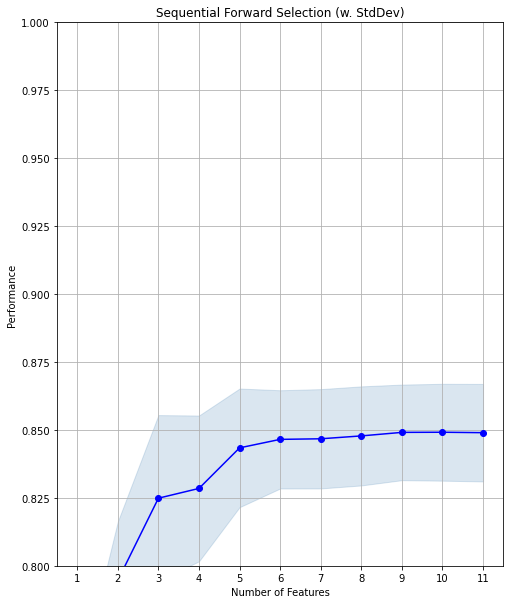

In [46]:
# Plotting the results

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(ffs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

best combination (R2: 0.851): (0, 1, 2, 4, 5, 6, 7, 8, 10)

all subsets:
 {1: {'feature_idx': (4,), 'cv_scores': array([0.73207897, 0.74592221, 0.70552637, 0.76353625, 0.75412344]), 'avg_score': 0.7402374445890859, 'feature_names': ('4',)}, 2: {'feature_idx': (2, 4), 'cv_scores': array([0.81365097, 0.82114802, 0.75951967, 0.82909033, 0.84342887]), 'avg_score': 0.813367572314163, 'feature_names': ('2', '4')}, 3: {'feature_idx': (1, 2, 4), 'cv_scores': array([0.82611803, 0.83315353, 0.79904187, 0.85680533, 0.84514207]), 'avg_score': 0.8320521674904633, 'feature_names': ('1', '2', '4')}, 4: {'feature_idx': (0, 1, 2, 4), 'cv_scores': array([0.82951472, 0.83716843, 0.7994109 , 0.85950397, 0.85141237]), 'avg_score': 0.8354020784517129, 'feature_names': ('0', '1', '2', '4')}, 5: {'feature_idx': (0, 1, 2, 4, 10), 'cv_scores': array([0.83567023, 0.84909738, 0.82359283, 0.87423994, 0.85525444]), 'avg_score': 0.8475709630832992, 'feature_names': ('0', '1', '2', '4', '10')}, 6: {'feature_idx': (0,

Text(0.5, 1.0, 'Sequential Forward Selection (w. StdDev)')

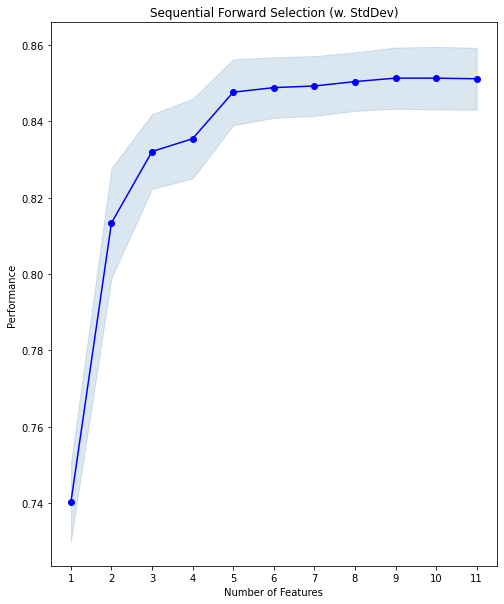

In [47]:



from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test= train_test_split(Wrapper_X, Wrapper_y, 
#                                                    stratify= Wrapper_y,
                                                   test_size=0.3,
                                                   random_state=1)

knn = KNeighborsRegressor(n_neighbors=2)

sfs1 = SFS(
#            estimator=knn,
           estimator=lr,
           k_features=  (3, 11),
           forward=True, 
           floating=False, 
           scoring='r2',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('best combination (R2: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');
plt.title('Sequential Forward Selection (w. StdDev)')

### 2 Backward Feature elimination

In [48]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

bfs = SFS(
        lr,
#         reg_pipeline, 
           k_features='best', 
           forward=False, 
           scoring='r2',
           cv=cv,
           n_jobs=1,
           
          )

bfs.fit(Wrapper_X,Wrapper_y)




SequentialFeatureSelector(cv=KFold(n_splits=10, random_state=0, shuffle=True),
                          estimator=LinearRegression(), forward=False,
                          k_features='best', scoring='r2')

In [49]:
bfs.subsets_

{11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
  'cv_scores': array([0.81740319, 0.86454296, 0.83227253, 0.84887298, 0.8453193 ,
         0.85225649, 0.86843496, 0.88093043, 0.83247542, 0.8472778 ]),
  'avg_score': 0.8489786051313641,
  'feature_names': ('DEPTH',
   'CALI',
   'GR',
   'ILD',
   'ITT',
   'LLD',
   'LLS',
   'MSFL',
   'NPHI',
   'SFL',
   'SP')},
 10: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 10),
  'cv_scores': array([0.81654622, 0.86427844, 0.83228811, 0.84870041, 0.84624032,
         0.8541268 , 0.86810798, 0.88021329, 0.83371359, 0.84717987]),
  'avg_score': 0.849139503123246,
  'feature_names': ('DEPTH',
   'CALI',
   'GR',
   'ILD',
   'ITT',
   'LLD',
   'LLS',
   'MSFL',
   'NPHI',
   'SP')},
 9: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 10),
  'cv_scores': array([0.81796995, 0.86433116, 0.83238864, 0.84808089, 0.8464984 ,
         0.85424399, 0.86753077, 0.88015222, 0.83270506, 0.84698774]),
  'avg_score': 0.849088883466098,
  'feature_names': ('DE

In [50]:
# dir(bfs)
print(bfs.k_score_)
#  'k_feature_idx_',
print(bfs.k_feature_names_)

feat_cols=list(bfs.k_feature_idx_)
print(feat_cols)
print(Wrapper_X.columns)

0.849139503123246
('DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI', 'SP')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10]
Index(['DEPTH', 'CALI', 'GR', 'ILD', 'ITT', 'LLD', 'LLS', 'MSFL', 'NPHI',
       'SFL', 'SP'],
      dtype='object')


In [51]:
# Visualizing the results in DataFrames
pd.DataFrame.from_dict(bfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10)","[0.817403186360754, 0.8645429618966844, 0.8322...",0.848979,"(DEPTH, CALI, GR, ILD, ITT, LLD, LLS, MSFL, NP...",0.0133217,0.0179366,0.00597886
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 10)","[0.8165462222348999, 0.8642784397387218, 0.832...",0.84914,"(DEPTH, CALI, GR, ILD, ITT, LLD, LLS, MSFL, NP...",0.0132364,0.0178217,0.00594057
9,"(0, 1, 2, 4, 5, 6, 7, 8, 10)","[0.8179699484395783, 0.8643311644813959, 0.832...",0.849089,"(DEPTH, CALI, GR, ITT, LLD, LLS, MSFL, NPHI, SP)",0.0130595,0.0175835,0.00586117
8,"(0, 1, 2, 4, 6, 7, 8, 10)","[0.8165510036142976, 0.8629431520657443, 0.827...",0.847791,"(DEPTH, CALI, GR, ITT, LLS, MSFL, NPHI, SP)",0.0135373,0.0182268,0.00607561
7,"(0, 1, 2, 4, 7, 8, 10)","[0.8136646611859302, 0.8623600954052667, 0.827...",0.846731,"(DEPTH, CALI, GR, ITT, MSFL, NPHI, SP)",0.0135675,0.0182674,0.00608915
6,"(0, 1, 2, 4, 8, 10)","[0.813395044626325, 0.861181596357327, 0.82653...",0.846515,"(DEPTH, CALI, GR, ITT, NPHI, SP)",0.013425,0.0180757,0.00602523
5,"(0, 1, 2, 4, 10)","[0.8120961935959946, 0.8628048517996825, 0.812...",0.843392,"(DEPTH, CALI, GR, ITT, SP)",0.0162099,0.0218253,0.0072751
4,"(0, 1, 4, 10)","[0.8046713006890391, 0.8563760730091079, 0.821...",0.838677,"(DEPTH, CALI, ITT, SP)",0.0131706,0.0177331,0.00591104
3,"(0, 1, 4)","[0.7779623093724037, 0.8311718489241277, 0.773...",0.811676,"(DEPTH, CALI, ITT)",0.0182171,0.0245277,0.00817591
2,"(1, 4)","[0.7586041077878787, 0.8133157076650194, 0.767...",0.794631,"(CALI, ITT)",0.0160945,0.0216698,0.00722327


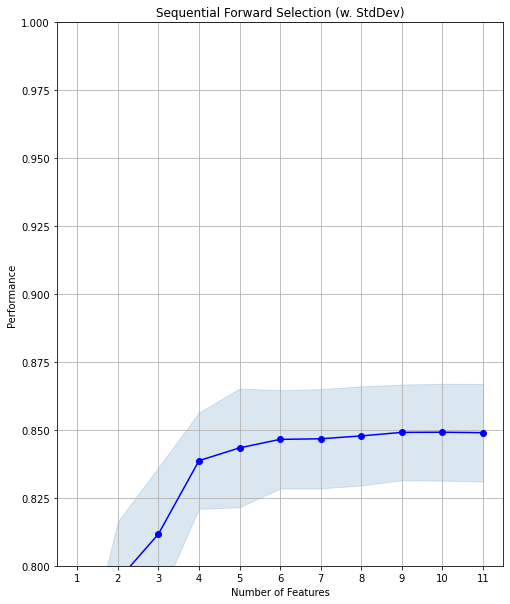

In [52]:
# Plotting the results

from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig1 = plot_sfs(bfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

best combination (R2: 0.851): (0, 1, 2, 4, 5, 6, 7, 8, 10)

all subsets:
 {11: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10), 'cv_scores': array([0.84170849, 0.85478042, 0.82694803, 0.8756482 , 0.85635552]), 'avg_score': 0.8510881325554474, 'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10')}, 10: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 9, 10), 'cv_scores': array([0.84147609, 0.85455967, 0.82662566, 0.87526042, 0.85825922]), 'avg_score': 0.8512362106486258, 'feature_names': ('0', '1', '2', '4', '5', '6', '7', '8', '9', '10')}, 9: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 8, 10), 'cv_scores': array([0.84188506, 0.85417377, 0.82720094, 0.87484282, 0.85815991]), 'avg_score': 0.8512525013323773, 'feature_names': ('0', '1', '2', '4', '5', '6', '7', '8', '10')}, 8: {'feature_idx': (0, 1, 2, 4, 5, 6, 7, 10), 'cv_scores': array([0.84204785, 0.85245767, 0.82461992, 0.87666064, 0.85709994]), 'avg_score': 0.8505772035014092, 'feature_names': ('0', '1', '2', '4', '5', '6', 

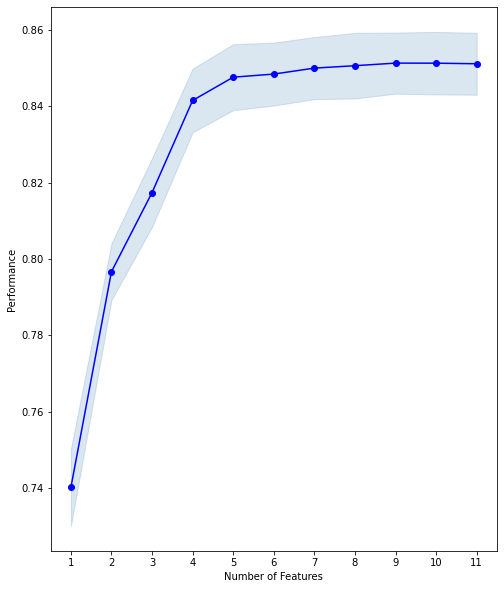

In [53]:



from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.data import wine_data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test= train_test_split(Wrapper_X, Wrapper_y, 
#                                                    stratify= Wrapper_y,
                                                   test_size=0.3,
                                                   random_state=1)

# knn = KNeighborsRegressor(n_neighbors=2)

sfs1 = SFS(
#            estimator=knn,
           estimator=lr,
           k_features=  (1, 11),
           forward=False, 
           floating=False, 
           scoring='r2',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('best combination (R2: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)
plot_sfs(sfs1.get_metric_dict(), kind='std_err');

### Toggling between SFS, SBS, SFFS, and SBFS
Using the forward and floating parameters, we can toggle between SFS, SBS, SFFS, and SBFS

In [54]:
# Sequential Forward Selection
sfs_x = SFS(lr, 
          k_features='best', 
          forward=True, 
          floating=False, 
          scoring='r2',
          cv=4,
          n_jobs=-1)
sfs_x = sfs_x.fit(X_train, y_train)

print('\nSequential Forward Selection (k=3):')
print(sfs_x.k_feature_idx_)
print('CV Score:')
print(sfs_x.k_score_)

###################################################

# Sequential Backward Selection
sbs_x = SFS(lr, 
          k_features='best', 
          forward=False, 
          floating=False, 
          scoring='r2',
          cv=4,
          n_jobs=-1)
sbs_x = sbs_x.fit(X_train, y_train)

print('\nSequential Backward Selection (k=3):')
print(sbs_x.k_feature_idx_)
print('CV Score:')
print(sbs_x.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS(lr, 
           k_features='best', 
           forward=True, 
           floating=True, 
           scoring='r2',
           cv=4,
           n_jobs=-1)
sffs = sffs.fit(X_train, y_train)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS(lr, 
           k_features='best', 
           forward=False, 
           floating=True, 
           scoring='r2',
           cv=4,
           n_jobs=-1)
sbfs = sbfs.fit(X_train, y_train)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k=3):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10)
CV Score:
0.8522903794208386

Sequential Backward Selection (k=3):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10)
CV Score:
0.8522903794208386

Sequential Forward Floating Selection (k=3):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10)
CV Score:
0.8522903794208386

Sequential Backward Floating Selection (k=3):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 10)
CV Score:
0.8522903794208386


### 3 Exhaustive Feature Selection

In [100]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# import the algorithm you want to evaluate on your features
from sklearn.ensemble import RandomForestRegressor

#create the exhaustiveFeatureSellector object.
efs_RFR = EFS(RandomForestRegressor(),
         min_features=4,
         max_features=10,
         scoring='r2',
         cv=cv)

efs2= EFS(lr, 
#            k_features='best', 
#            forward=False, 
           scoring='neg_mean_squared_error',
           cv=cv,
           n_jobs=1,
           
          )

# fit to object to the training data
efs_RFR =efs_RFR.fit(Wrapper_X,Wrapper_y)

#print the selected features
selected_features= Wrapper_X.columns[list(efs_RFR.best_idx_)]
print(selected_features)


KeyboardInterrupt: 

# embeded methods¶
### Lasso regularization

In [55]:
pd_data1_Sd_lasso=pd_data1_Sd.copy()
embeded_X = pd_data1_Sd_lasso.drop(columns='RHOB')
embeded_y = pd_data1_Sd_lasso.RHOB

In [56]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(embeded_X,embeded_y )
print("Best alpha using built-in LassoCV:%f" % reg.alpha_)
print("Best score using built-in LassoCV:%f" % reg.score(embeded_X ,embeded_y ))
coef =pd.Series(reg.coef_, index = embeded_X.columns)


Best alpha using built-in LassoCV:0.010534
Best score using built-in LassoCV:0.844351


In [57]:
print('Lasso picked '+ str(sum(coef != 0)) + "variables and eliminated the other "+ str(sum(coef== 0)) +"variables")

Lasso picked 7variables and eliminated the other 4variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

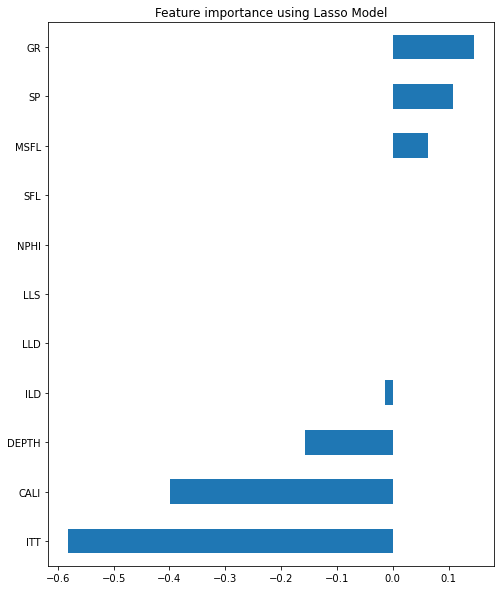

In [58]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = 'barh')
plt.title("Feature importance using Lasso Model")

# Random Forest importance

In [26]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=340)


from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=340)

model.fit(embeded_X,embeded_y)

importances = pd.DataFrame({"Features": pd.DataFrame(embeded_X).columns, "importances":importances})
final_df.set_index('importances')

final_df= final_df.sort_values('Importance')

final_df.plot.bar(color = 'teal')

NameError: name 'importances' is not defined

In [59]:
# for regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

rf = RandomForestRegressor(n_estimators=100)
rf.fit(embeded_X,embeded_y)



RandomForestRegressor()

In [60]:
rf.feature_importances_



array([0.59353895, 0.04138098, 0.01272698, 0.01487969, 0.01071159,
       0.01729193, 0.06481584, 0.14572515, 0.08925208, 0.00329674,
       0.00638008])

<BarContainer object of 11 artists>

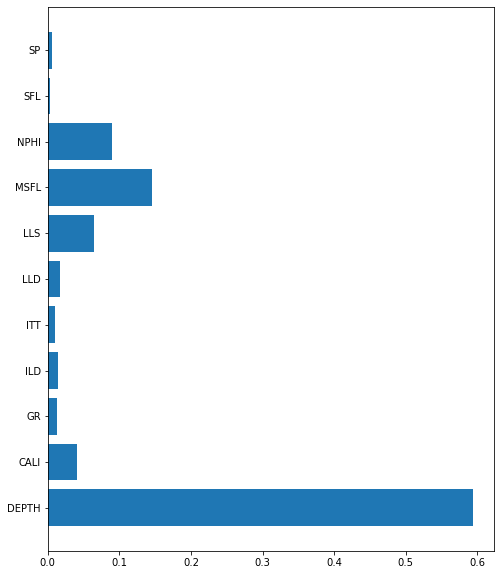

In [61]:

forest_columns=['DEPTH',
 'CALI',
 'GR',
 'ILD',
 'ITT',
 'LLD',
 'LLS',
 'MSFL',
 'NPHI',
 'SFL',
 'SP']
plt.barh(forest_columns, rf.feature_importances_)

In [33]:
# wants to rearrange it to in decrease order
sorted_idx = rf.feature_importances_.argsort()
sorted_idx
plt.barh(forest_columns[sorted_idx], rf.feature_importances_[sorted_idx])
# plt.xlabel("Random Forest Feature Importance")


TypeError: only integer scalar arrays can be converted to a scalar index

# models

In [ ]:
# ANN

In [6]:
def myANN1( inputs, target):
    from sklearn import datasets, metrics, model_selection
    import tensorflow as tf
    from tensorflow import keras
    


    train_input, test_input, train_target, test_target = model_selection.train_test_split(inputs, target, train_size=0.7)

    
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Dropout

    model1 = Sequential()
    model1.add(Dense(64,activation="relu"
                              , input_shape=(inputs.shape[1],), 
                                 ))
    model1.add(Dropout(0.2))
    model1.add(Dense(64,activation="relu"
                                 ))
    model1.add(Dropout(0.2))
    model1.add(Dense(units = 1))


    model1.compile(optimizer = 'adam', loss = 'mae')

    model1.summary()
    
    
    

    # TRAIN    

#     %%time
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

    model1.fit(
        train_input, train_target,
        validation_split=0.3,
        verbose=0,
        batch_size = 3,


        #early stopping
        callbacks= keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

        #to store callbacks in logs
    #     callbacks =[tb_callback]
    )

    predicted = model1.predict(test_input)
    
    final= print("r2 score: {}".format(metrics.r2_score(test_target,predicted)))
#     print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))
    
    return model1, final



# # using sklearn
# print("r2 score: {}".format(metrics.r2_score(test_target,predicted)))
# print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted)))

In [ ]:
dataset1.shape[1]

In [ ]:

from sklearn import svm, datasets, metrics, model_selection, preprocessing, pipeline
from sklearn import svm

model2 = pipeline.make_pipeline(
#     preprocessing.StandardScaler(),
    svm.SVR(C=10.0,
#             epsilon=0.2
            gamma= 1
           ))
model2.fit(train_input, train_target)


predicted2 = model2.predict(test_input)



print("r2 score: {}".format(metrics.r2_score( test_target, predicted2)))
print("mae: {}".format(metrics.mean_absolute_error(test_target, predicted2)))

In [ ]:
# Feat_extracts well3


def XGBmodel(wellname):

    df = pd.read_excel(xlsx, wellname)
    dataset_ext= df.copy()


    from sklearn.preprocessing import StandardScaler
    scaler1 = StandardScaler()
    Sd_scaler1 =scaler1.fit(dataset_ext)
    data1_Sd= Sd_scaler1.transform(dataset_ext)
    # print(data1_Sd)

            #convert to dataframe
    dataset= pd.DataFrame(data1_Sd, columns=dataset_ext.keys())


    print(dataset)
    # split datat into input and target

    inputs2 = dataset.copy()
    target = inputs2.pop('RHOB')

    from xgboost import XGBRegressor
    from xgboost import XGBRFRegressor

    model_Test2= XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=10,
             min_child_weight=3, monotone_constraints='()',
             n_estimators=500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

    model_Test2.fit(train_input, train_target,
              early_stopping_rounds=10, eval_set=[(test_input, test_target)], verbose=False
              )
    
    
    predicted3 = model3.predict(inputs2)


    print("r2 score: {}".format(metrics.r2_score(target, predicted)))
    print("mae: {}".format(metrics.mean_absolute_error(target, predicted)))
    
    return 

predictme('1S 4X')
# predictme("Feat_extracts well4.xlsx")